## Combining data for all simulations (1960 - 2016)

In this notebook, we combine data for all simulations to make sure that all datafiles can be accessed within a single xarray dataset.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Check data for overturning strength and transport diagnostics  

In [4]:
ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/"

# variable list to keep in the dataset
var_list = ['hfbasin_atlantic', 'hfbasinpmdiff_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic', 
            'sltbasin_atlantic', 'sltbasinpmdiff_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic',
            'zomsfatl', 'time']

ds = []

# Loop over year to combine indivual year files
for year in range(1960, 2017 ,2):
    
    d = xr.open_dataset(ppdir + str(year) + "_diaptr.nc")
    d = d.get(var_list)
    ds.append(d)
    
ds = xr.concat(ds, dim='start_year')

ds = ds.assign(start_year = np.arange(1960, 2017, 2))

ds = ds.chunk({'start_year': 1})

print(ds)

<xarray.Dataset>
Dimensions:                  (depthw: 75, r: 10, start_year: 29, time_counter: 125, x: 1, y: 451)
Coordinates:
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nav_lon                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lat                  (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    time_centered            (start_year, time_counter) object dask.array<shape=(29, 125), chunksize=(1, 125)>
  * start_year               (start_year) int64 1960 1962 1964 ... 2014 2016
Dimensions without coordinates: r, x, y
Data variables:
    hfbasin_atlantic         (start_year, r, time_counter, y, x) float32 dask.array<shape=(29, 10, 125, 451, 1), chunksize=(1, 10, 125, 451, 1)>
    hfbasinpmdiff_atlantic   (start_year, r, time_counter, y, x) float32 dask.array<shape=(29, 10, 125, 451, 1), chunksize=(1, 10, 125, 451, 

#### Overturning Strength

In [5]:
# Check how Overturning strength looks like at 30 N, 40 N and 50 N

psi_max = ds.zomsfatl.mean(['x'])
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0))
psi_max = psi_max.sel(y=[30., 40., 50.], method="nearest")
lat = ['30 N', '40 N', '50 N']

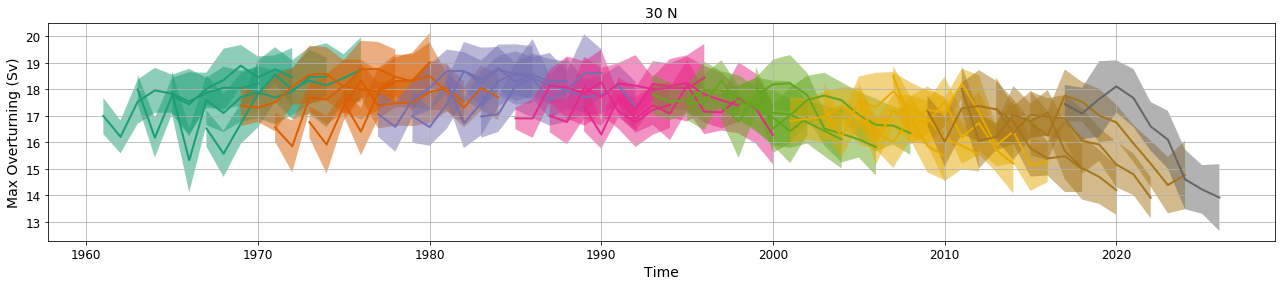

In [7]:
grid = plt.GridSpec(1, 1, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[22,4])

col = plt.cm.Dark2(np.linspace(0.,0.9, len(ds.start_year)))

for i in range(0,1):
    
    ax = fig.add_subplot(grid[0, i])
    
    for j in range(0,len(ds.start_year)):
        
        tmp = (psi_max.isel(y=i, start_year=j, time_counter=slice(2,122))).max(dim='depthw').groupby('time_centered.year').mean('time_counter')
        ax.plot(tmp.year, tmp.mean('r'), lw = 2., color=col[j])
        ax.fill_between(tmp.year, tmp.mean('r') - tmp.std('r'), tmp.mean('r') + tmp.std('r'), facecolor=col[j], alpha=0.7)
        
    ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    plt.title(lat[i], fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

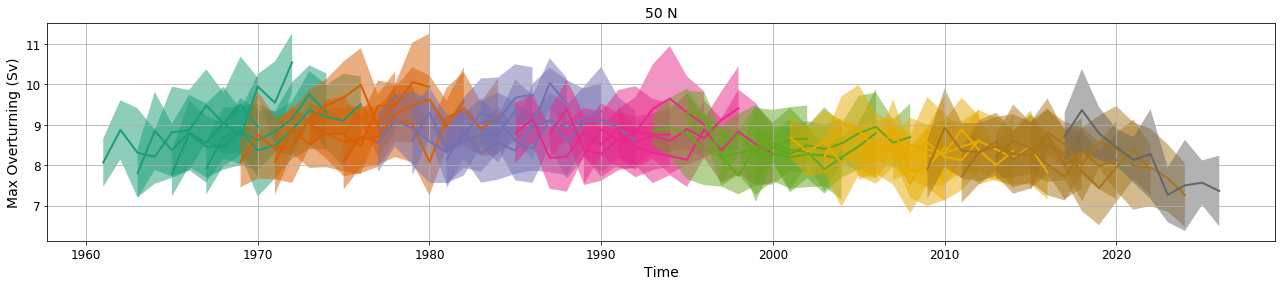

In [9]:
grid = plt.GridSpec(1, 1, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[22,4])

col = plt.cm.Dark2(np.linspace(0.,0.9, len(ds.start_year)))

for i in range(2,3):
    
    ax = fig.add_subplot(grid[0, 0])
    
    for j in range(0,len(ds.start_year)):
        
        tmp = (psi_max.isel(y=i, start_year=j, time_counter=slice(2,122))).max(dim='depthw').groupby('time_centered.year').mean('time_counter')
        ax.plot(tmp.year, tmp.mean('r'), lw = 2., color=col[j])
        ax.fill_between(tmp.year, tmp.mean('r') - tmp.std('r'), tmp.mean('r') + tmp.std('r'), facecolor=col[j], alpha=0.7)
        
    ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    plt.title(lat[i], fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

#### Heat and Salt transport between 20N - 30N

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 <a list of 9 Text xticklabel objects>)

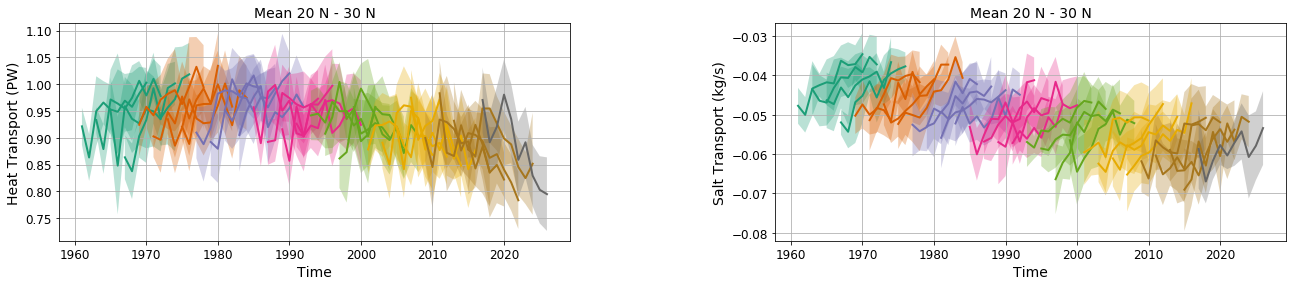

In [15]:
HT = ds['hfbasin_atlantic'].mean(['x'])
HT = HT.assign_coords(y=ds.nav_lat.isel(x=0))
HT = HT.sel(y=slice(20., 30.)).mean('y')

ST = ds['sltbasin_atlantic'].mean(['x'])
ST = ST.assign_coords(y=ds.nav_lat.isel(x=0))
ST = ST.sel(y=slice(20., 30.)).mean('y')

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,4])

ax = fig.add_subplot(grid[0, 0])

for j in range(0,len(ds.start_year)):
        
    tmp = (HT.isel(start_year=j, time_counter=slice(2,122))).groupby('time_centered.year').mean('time_counter')
    ax.plot(tmp.year, tmp.mean('r'), lw = 2., color=col[j])
    ax.fill_between(tmp.year, tmp.mean('r') - tmp.std('r'), tmp.mean('r') + tmp.std('r'), facecolor=col[j], alpha=0.3)
        
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
plt.title('Mean 20 N - 30 N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])

for j in range(0,len(ds.start_year)):
        
    tmp = (ST.isel(start_year=j, time_counter=slice(2,122))).groupby('time_centered.year').mean('time_counter')
    ax.plot(tmp.year, tmp.mean('r'), lw = 2., color=col[j])
    ax.fill_between(tmp.year, tmp.mean('r') - tmp.std('r'), tmp.mean('r') + tmp.std('r'), facecolor=col[j], alpha=0.3)
        
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
plt.title('Mean 20 N - 30 N', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

In [12]:
ds['hfbasin_atlantic']

<xarray.DataArray 'hfbasin_atlantic' (start_year: 29, r: 10, time_counter: 125, y: 451, x: 1)>
dask.array<shape=(29, 10, 125, 451, 1), dtype=float32, chunksize=(1, 10, 125, 451, 1)>
Coordinates:
  * time_counter   (time_counter) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon        (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    nav_lat        (y, x) float32 dask.array<shape=(451, 1), chunksize=(451, 1)>
    time_centered  (start_year, time_counter) object dask.array<shape=(29, 125), chunksize=(1, 125)>
  * start_year     (start_year) int64 1960 1962 1964 1966 ... 2012 2014 2016
Dimensions without coordinates: r, y, x
Attributes:
    standard_name:       northward_ocean_heat_transport
    long_name:           Advective Heat Transport
    units:               PW
    online_operation:    average
    interval_operation:  900 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 900 s)